In [2]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

import pipeline
import importlib
importlib.reload(pipeline)

<module 'pipeline' from '/content/pipeline.py'>

In [0]:
# compute hamming distance from point to set
def ham_set(p, t):
    p = p.transpose()
    n1 = np.matmul(t, p)
    n0 = np.matmul(1 - t, 1 - p)
    return len(p) - np.amax(n1 + n0, axis=0)

In [0]:
models = {(n_labels, p_noise) : pipeline.PurchaseModel(n_labels) for n_labels in [2, 10, 20] for p_noise in np.linspace(0, 0.5, 11)}
_ = [model.load_data(p_noise = p_noise) for (_, p_noise), model in models.items()]
_ = [model.build_net() for model in models.values()]
_ = [model.train(nn.NLLLoss(), epochs = 250, batch_tests = False) for model in models.values()]

In [15]:
models2 = {(n_labels, p_noise) : pipeline.PurchaseModel(n_labels) for n_labels in [50, 100] for p_noise in np.linspace(0, 0.5, 11)}
_ = [model.load_data(p_noise = p_noise) for (_, p_noise), model in models2.items()]
_ = [model.build_net() for model in models2.values()]
_ = [model.train(nn.NLLLoss(), epochs = 250, batch_tests = False) for model in models2.values()]

Loading 50-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 50-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 50-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 50-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 50-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 50-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 50-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 50-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 50-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 50-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 50-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 100-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 100-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 100-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 100-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 100-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 100-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 100-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 100-Purchase 

In [0]:
aucs = {key : model.auc() for key, model in models.items()}
aucs2 = {key : model.auc() for key, model in models2.items()}

In [0]:
by_distance = {(n_labels, p_noise) : model.auc_by_distance(ham_set, 3) for (n_labels, p_noise), model in models.items() if p_noise == 0}
by_distance2 = {(n_labels, p_noise) : model.auc_by_distance(ham_set, 3) for (n_labels, p_noise), model in models2.items() if p_noise == 0}

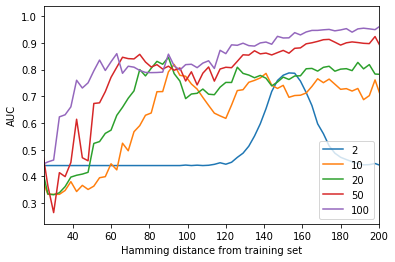

In [27]:
import matplotlib.pyplot as plt
for (n_labels, _), pair in by_distance.items():
    keys, auc = pair
    plt.plot(keys, auc, label = n_labels)
for (n_labels, _), pair in by_distance2.items():
    keys, auc = pair
    plt.plot(keys, auc, label = n_labels)
plt.legend(loc = 'lower right')
plt.xlim(25, 200)
plt.xlabel("Hamming distance from training set")
plt.ylabel("AUC")
plt.show()

In [0]:
noises = sorted([p for (_, p) in aucs.keys()])
labels = sorted([n for (n, _) in aucs.keys()])
labels2 = sorted([n for (n, _) in aucs2.keys()])
noisy_auc = {}
for n in labels:
  noisy_auc[n] = []
  for p in noises:
    noisy_auc[n].append(aucs[(n, p)])
for n in labels2:
  noisy_auc[n] = []
  for p in noises:
    noisy_auc[n].append(aucs2[(n, p)])

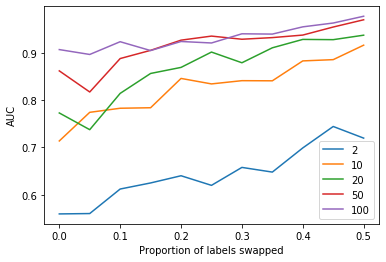

In [28]:
import matplotlib.pyplot as plt
for n_labels, lst in noisy_auc.items():
    plt.plot(noises, lst, label = n_labels)
plt.legend(loc = 'lower right')
plt.xlabel("Proportion of labels swapped")
plt.ylabel("AUC")
plt.show()